# Analyse Comparative des Expériences JibJobRecSys
Ce notebook permet de charger et de comparer les résultats de plusieurs expériences (runs) du système de recommandation JibJobRecSys.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Chargement des résultats expérimentaux

In [12]:
results_path = '../results/all_experiment_results.csv'
results_df = pd.read_csv(results_path)
results_df = results_df.sort_values(by='timestamp')
results_df.head()

,timestamp,experiment_name,num_layers,hidden_channels,epochs_run,final_train_loss,final_val_loss,AUC-ROC,MAE,RMSE,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20
6,2025-05-26 11:07:34,hgt_2layers_64hidden_60epochs,2,256,60,0.457369,0.436772,0.818460,0.316592,0.422731,0.254,0.139881,0.245162,0.269,0.298754,0.275579,0.2350,0.529635,0.395690
7,2025-05-26 11:24:25,hgt_2layers_64hidden_60epochs,2,256,60,0.451918,0.452528,0.814489,0.340581,0.439022,0.272,0.154091,0.268923,0.276,0.308722,0.294041,0.2305,0.517976,0.403444
8,2025-05-26 11:37:05,hgt_2layers_64hidden_60epochs,2,256,60,0.455866,0.453749,0.816058,0.340810,0.444446,0.312,0.174167,0.313121,0.302,0.337274,0.327848,0.2350,0.529504,0.427864
9,2025-05-26 11:49:04,hgt_2layers_64hidden_60epochs,2,256,60,0.455132,0.445378,0.815725,0.325928,0.439402,0.292,0.164480,0.285459,0.301,0.339615,0.317475,0.2330,0.523496,0.414391
10,2025-05-26 12:53:56,test_001,2,256,60,0.436979,0.425621,0.822518,0.304373,0.419364,0.294,0.165802,0.284959,0.300,0.337806,0.314713,0.2490,0.559405,0.432014


## 2. Tableau des résultats trié par NDCG@10

In [13]:
if 'NDCG@10' in results_df.columns:
    display(results_df.sort_values(by='NDCG@10', ascending=False))
else:
    display(results_df)

,timestamp,experiment_name,num_layers,hidden_channels,epochs_run,final_train_loss,final_val_loss,AUC-ROC,MAE,RMSE,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20
1,5/26/2025 10:34,hgt_2layers_64hidden_60epochs,2,64,60,0.454685,0.445637,0.830289,0.306892,0.406012,0.336,0.189528,0.329618,0.314,0.354020,0.341338,0.2605,0.585873,0.463142
8,2025-05-26 11:37:05,hgt_2layers_64hidden_60epochs,2,256,60,0.455866,0.453749,0.816058,0.340810,0.444446,0.312,0.174167,0.313121,0.302,0.337274,0.327848,0.2350,0.529504,0.427864
2,5/26/2025 10:35,hgt_2layers_64hidden_60epochs,2,128,60,0.442558,0.445078,0.809069,0.307131,0.423899,0.312,0.175008,0.310846,0.297,0.332937,0.322523,0.2345,0.526635,0.425022
0,5/26/2025 10:33,hgt_2layers_64hidden_60epochs,2,32,60,0.465979,0.468573,0.817355,0.336264,0.431848,0.304,0.171730,0.302058,0.298,0.336754,0.322423,0.2510,0.566635,0.444549
9,2025-05-26 11:49:04,hgt_2layers_64hidden_60epochs,2,256,60,0.455132,0.445378,0.815725,0.325928,0.439402,0.292,0.164480,0.285459,0.301,0.339615,0.317475,0.2330,0.523496,0.414391
10,2025-05-26 12:53:56,test_001,2,256,60,0.436979,0.425621,0.822518,0.304373,0.419364,0.294,0.165802,0.284959,0.300,0.337806,0.314713,0.2490,0.559405,0.432014
4,5/26/2025 10:50,hgt_2layers_64hidden_60epochs,2,256,60,0.447365,0.432635,0.813717,0.314760,0.417086,0.274,0.155306,0.270337,0.284,0.320552,0.300844,0.2435,0.548040,0.421128
3,5/26/2025 10:36,hgt_2layers_64hidden_60epochs,2,256,60,0.452070,0.438468,0.811343,0.313835,0.423072,0.244,0.134198,0.254336,0.287,0.320286,0.299439,0.2360,0.529968,0.410437
11,2025-05-28 00:20:04,test_001,2,256,60,0.456399,0.447960,0.815265,0.298539,0.392956,0.276,0.154940,0.274511,0.279,0.314361,0.297908,0.2295,0.519238,0.406706
7,2025-05-26 11:24:25,hgt_2layers_64hidden_60epochs,2,256,60,0.451918,0.452528,0.814489,0.340581,0.439022,0.272,0.154091,0.268923,0.276,0.308722,0.294041,0.2305,0.517976,0.403444


## 3. Impact du nombre de hidden channels

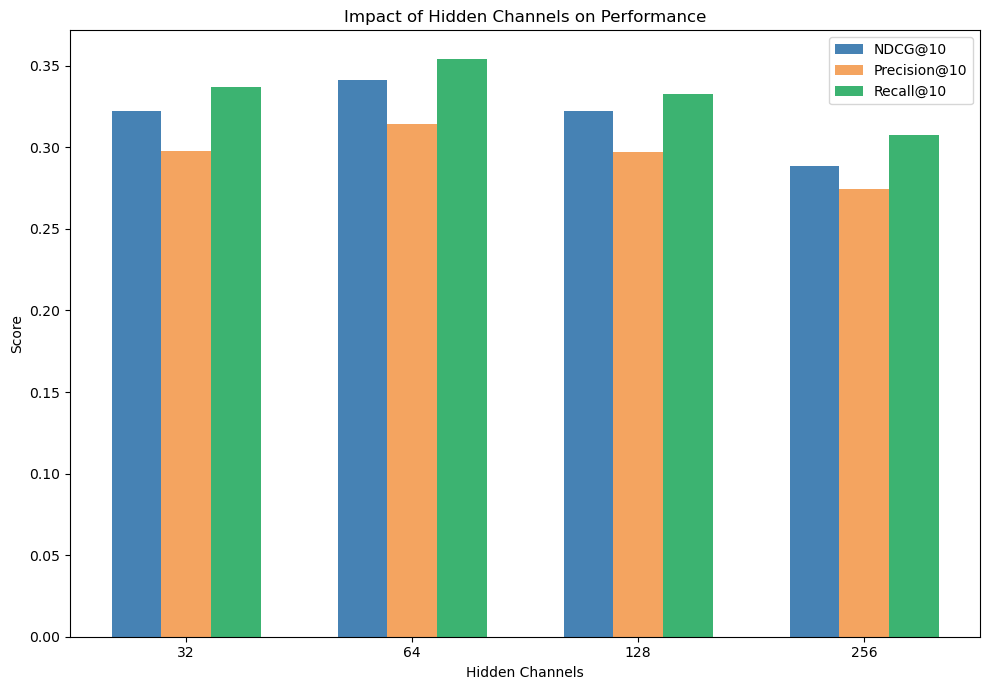

In [14]:
if 'hidden_channels' in results_df.columns and 'NDCG@10' in results_df.columns:
    import numpy as np
    grouped = results_df.groupby('hidden_channels').mean(numeric_only=True).reset_index()
    x_categories = grouped['hidden_channels'].astype(str).tolist()
    metrics_to_plot = ['NDCG@10', 'Precision@10', 'Recall@10']
    n_metrics = len(metrics_to_plot)
    index = np.arange(len(x_categories))
    bar_width = 0.22
    plt.figure(figsize=(10, 7))
    colors = ['steelblue', 'sandybrown', 'mediumseagreen']
    for i, metric in enumerate(metrics_to_plot):
        plt.bar(index + (i - 1)*bar_width, grouped[metric], bar_width, label=metric, color=colors[i])
    plt.xlabel('Hidden Channels')
    plt.ylabel('Score')
    plt.title('Impact of Hidden Channels on Performance')
    plt.xticks(index, x_categories)
    plt.legend()
    plt.tight_layout()
    os.makedirs('../visualizations', exist_ok=True)
    plt.savefig('../visualizations/performance_vs_hidden_channels_grouped.png')
    plt.show()

## 4. Impact du nombre de couches (num_layers)

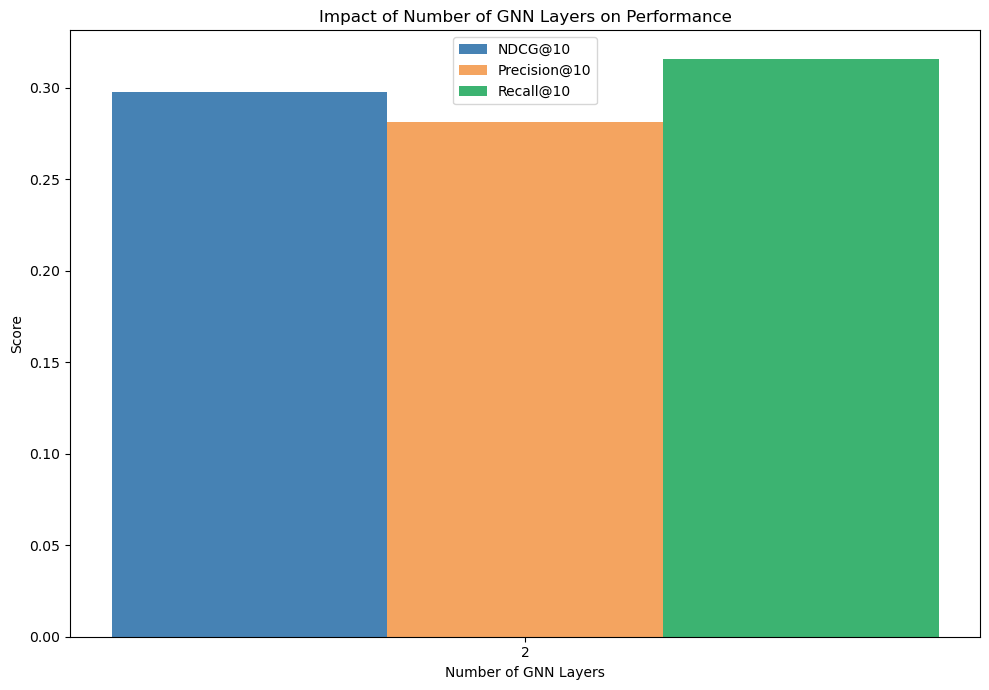

In [15]:
if 'num_layers' in results_df.columns and 'NDCG@10' in results_df.columns:
    import numpy as np
    grouped = results_df.groupby('num_layers').mean(numeric_only=True).reset_index()
    x_categories = grouped['num_layers'].astype(str).tolist()
    metrics_to_plot = ['NDCG@10', 'Precision@10', 'Recall@10']
    n_metrics = len(metrics_to_plot)
    index = np.arange(len(x_categories))
    bar_width = 0.22
    plt.figure(figsize=(10, 7))
    colors = ['steelblue', 'sandybrown', 'mediumseagreen']
    for i, metric in enumerate(metrics_to_plot):
        plt.bar(index + (i - 1)*bar_width, grouped[metric], bar_width, label=metric, color=colors[i])
    plt.xlabel('Number of GNN Layers')
    plt.ylabel('Score')
    plt.title('Impact of Number of GNN Layers on Performance')
    plt.xticks(index, x_categories)
    plt.legend()
    plt.tight_layout()
    plt.savefig('../visualizations/performance_vs_num_layers_grouped.png')
    plt.show()

## 5. Courbes de perte comparatives (optionnel)

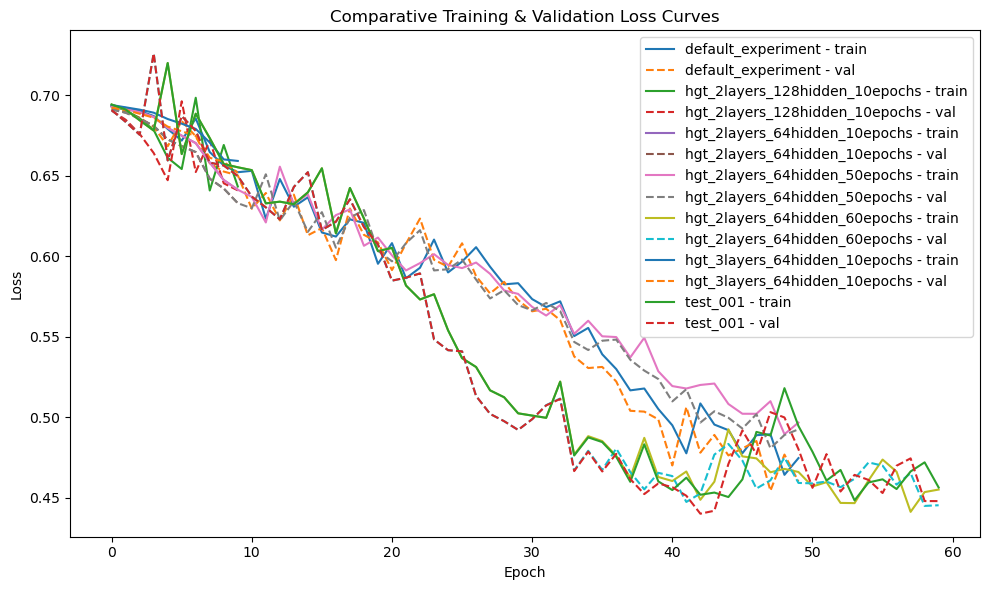

In [16]:
import glob
# Charger les historiques d'entraînement pour les meilleurs runs
history_files = glob.glob('../results/training_history_*.csv')
plt.figure(figsize=(10,6))
for file in history_files:
    hist = pd.read_csv(file)
    exp_name = os.path.basename(file).replace('training_history_','').replace('.csv','')
    plt.plot(hist['train_loss'], label=f'{exp_name} - train')
    plt.plot(hist['val_loss'], label=f'{exp_name} - val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparative Training & Validation Loss Curves')
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/comparative_loss_curves.png')
plt.show()

## 6. Comparaison RMSE et MAE

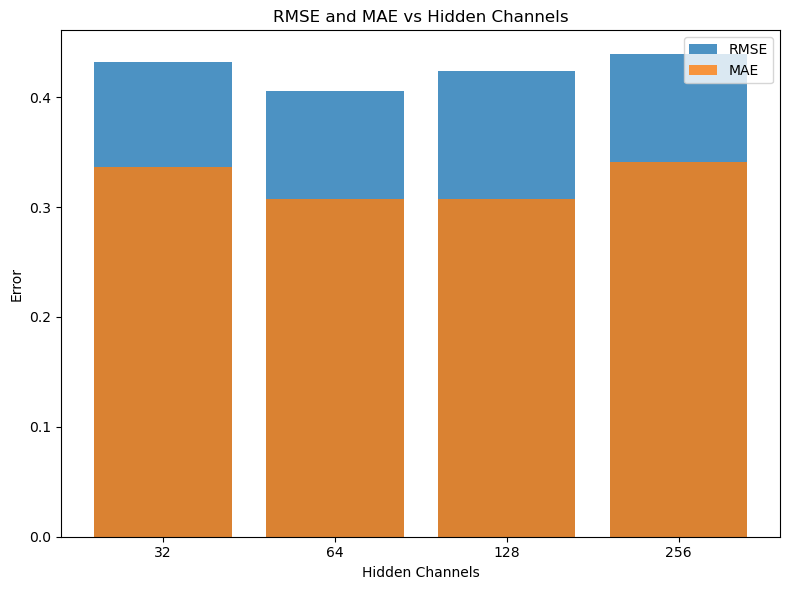

In [17]:
if 'hidden_channels' in results_df.columns and 'RMSE' in results_df.columns:
    plt.figure(figsize=(8,6))
    grouped = results_df.groupby('hidden_channels').mean(numeric_only=True)
    x = grouped.index.astype(str)
    plt.bar(x, grouped['RMSE'], label='RMSE', alpha=0.8)
    plt.bar(x, grouped['MAE'], label='MAE', alpha=0.8)
    plt.xlabel('Hidden Channels')
    plt.ylabel('Error')
    plt.title('RMSE and MAE vs Hidden Channels')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../visualizations/rmse_mae_vs_hidden_channels.png')
    plt.show()

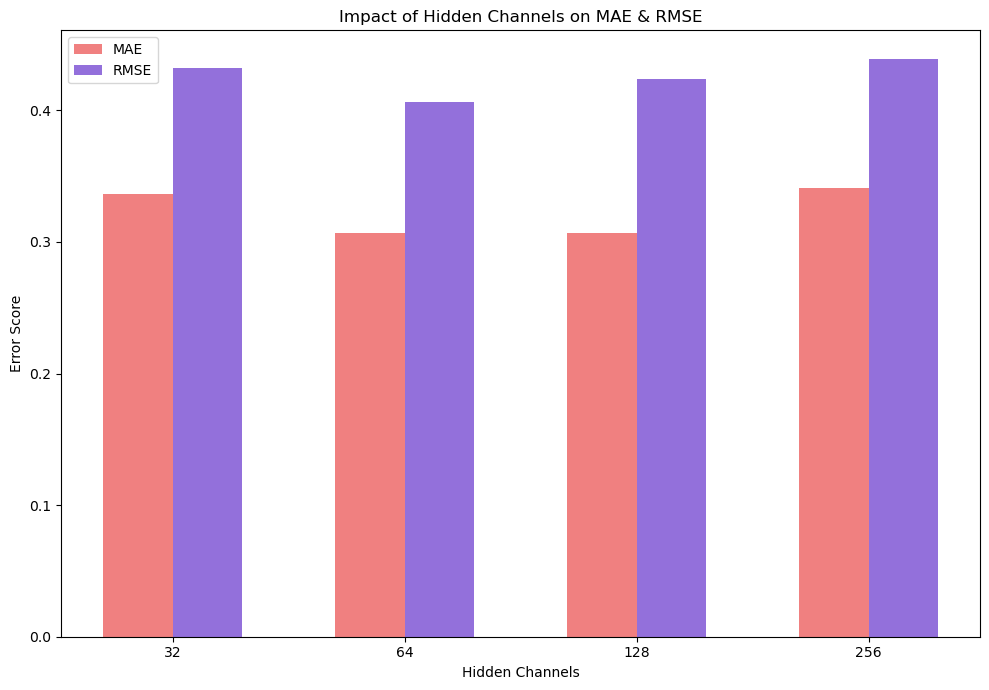

In [18]:
## 8. Impact du nombre de hidden channels sur MAE & RMSE
# Group by hidden_channels and compute mean for MAE and RMSE
if 'hidden_channels' in results_df.columns and 'MAE' in results_df.columns and 'RMSE' in results_df.columns:
    grouped = results_df.groupby('hidden_channels').mean(numeric_only=True).reset_index()
    x_categories = grouped['hidden_channels'].astype(str).tolist()
    mae_scores = grouped['MAE'].tolist()
    rmse_scores = grouped['RMSE'].tolist()
    index = np.arange(len(x_categories))
    bar_width = 0.30
    plt.figure(figsize=(10, 7))
    plt.bar(index - bar_width/2, mae_scores, bar_width, label='MAE', color='lightcoral')
    plt.bar(index + bar_width/2, rmse_scores, bar_width, label='RMSE', color='mediumpurple')
    plt.xlabel('Hidden Channels')
    plt.ylabel('Error Score')
    plt.title('Impact of Hidden Channels on MAE & RMSE')
    plt.xticks(index, x_categories)
    plt.legend()
    plt.tight_layout()
    plt.savefig('../visualizations/performance_vs_hidden_channels_error_metrics.png')
    plt.show()

## 7. Impact du nombre de couches (num_layers) sur MAE & RMSE

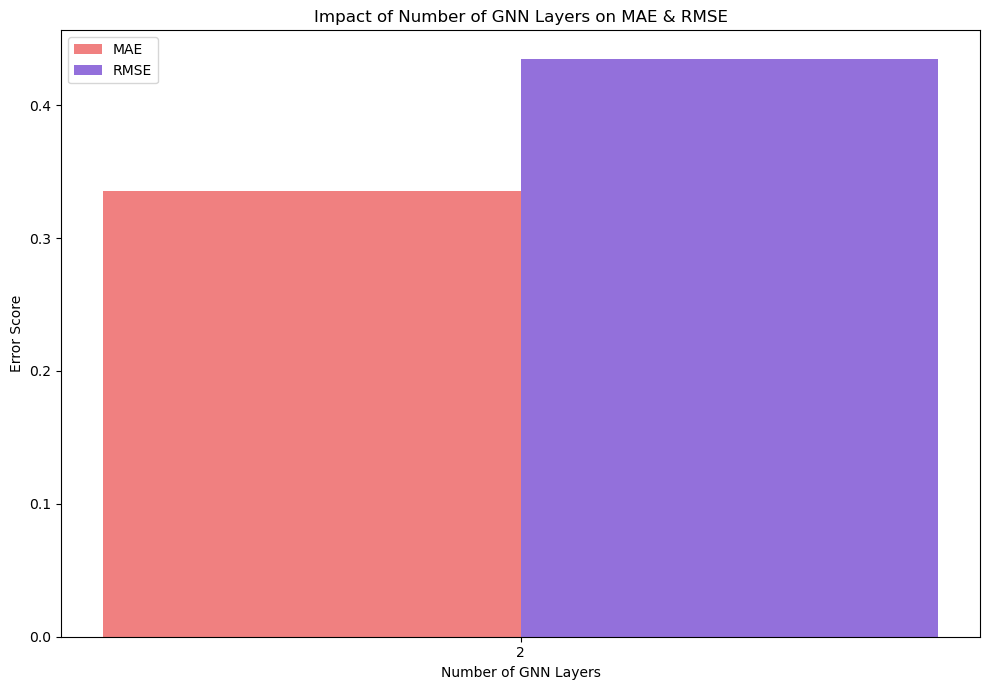

In [19]:
# Grouped bar chart: Number of GNN Layers vs MAE & RMSE
if 'num_layers' in results_df.columns and 'MAE' in results_df.columns and 'RMSE' in results_df.columns:
    import numpy as np
    grouped = results_df.groupby('num_layers').mean(numeric_only=True).reset_index()
    x_categories = grouped['num_layers'].astype(str).tolist()
    mae_scores = grouped['MAE'].tolist()
    rmse_scores = grouped['RMSE'].tolist()
    index = np.arange(len(x_categories))
    bar_width = 0.30
    plt.figure(figsize=(10, 7))
    plt.bar(index - bar_width/2, mae_scores, bar_width, label='MAE', color='lightcoral')
    plt.bar(index + bar_width/2, rmse_scores, bar_width, label='RMSE', color='mediumpurple')
    plt.xlabel('Number of GNN Layers')
    plt.ylabel('Error Score')
    plt.title('Impact of Number of GNN Layers on MAE & RMSE')
    plt.xticks(index, x_categories)
    plt.legend()
    plt.tight_layout()
    plt.savefig('../visualizations/performance_vs_num_layers_error_metrics.png')
    plt.show()